# Regression modeling

## 1. Linear Regression

In [2]:
import pylab as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 500

In [6]:
DPP_DTT_df = pd.read_csv("C:/Users/Myeongyeon Lee/Documents/GitHub\ofet-db/pgpractice/Machine Learning Practice/Regression/Datasets/DPP-DTT_cleaned_2.csv")
DPP_DTT_df

,solution_concentration,polymer_mw,polymer_mn,polymer_dispersity,solution_treatment,substrate_pretreatment,post_process,channel_width,channel_length,film_deposition_type_spin,dielectric_material_SiO2,electrode_configuration_BGBC,electrode_configuration_BGTC,electrode_configuration_TGBC,gate_material_Other,film_deposition_type_MGC,dielectric_material_other,solvent_boiling_point,substrate_pretreatment_type_sam,post_process_annealing,hole_mobility
0,4.00,299.000,90.000,3.320,0,0,1,1500,80,1,1,0,1,0,0,0,0,132.0,0,1,0.110000
1,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.290000
2,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.230000
3,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.730000
4,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,1.860000
5,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.210000
6,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.340000
7,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.240000
8,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,1.970000
9,4.00,299.000,90.000,3.320,0,1,1,1500,80,1,1,0,1,0,0,0,0,132.0,1,1,0.690000


In [7]:
DPP_DTT_df_columns = DPP_DTT_df.columns.tolist()
DPP_DTT_df_columns

['solution_concentration',
 'polymer_mw',
 'polymer_mn',
 'polymer_dispersity',
 'solution_treatment',
 'substrate_pretreatment',
 'post_process',
 'channel_width',
 'channel_length',
 'film_deposition_type_spin',
 'dielectric_material_SiO2',
 'electrode_configuration_BGBC',
 'electrode_configuration_BGTC',
 'electrode_configuration_TGBC',
 'gate_material_Other',
 'film_deposition_type_MGC',
 'dielectric_material_other',
 'solvent_boiling_point',
 'substrate_pretreatment_type_sam',
 'post_process_annealing',
 'hole_mobility']

In [8]:
DPP_DTT_Y = P3HT_df[['hole_mobility']]
DPP_DTT_X = P3HT_df.drop(labels = 'hole_mobility', axis = 1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size = 0.2, random_state=42)
LR_model = LinearRegression()
LR_model.fit(X_train, Y_train)

Y_pred = LR_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 3.4163956585716955
R^2 Score: 0.3678217753474765


## Polynomial regression

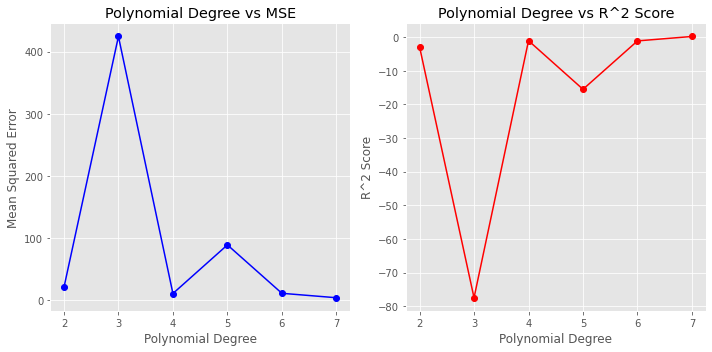

[21.01666231411412, 424.15819567675544, 11.200254019869904, 89.2862505388696, 11.546561910020174, 4.41937763538632]
[-2.888974696628933, -77.48727194169679, -1.0725224504291866, -15.521746598618815, -1.1366041110615175, 0.18222753251723212]


In [10]:
from sklearn.preprocessing import PolynomialFeatures

degrees = range(2, 8)  # Polynomial degrees from 2 to 10
mse_values = []  # To store mean squared error values
r2_values = []  # To store R^2 values

for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(DPP_DTT_X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, DPP_DTT_Y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting Polynomial Degree vs MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(degrees, mse_values, marker='o', linestyle='-', color='b')
plt.title('Polynomial Degree vs MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

# Plotting Polynomial Degree vs R^2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(degrees, r2_values, marker='o', linestyle='-', color='r')
plt.title('Polynomial Degree vs R^2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
print(mse_values)
print(r2_values)

## Ridge regression

Text(0, 0.5, 'R^2 Score')

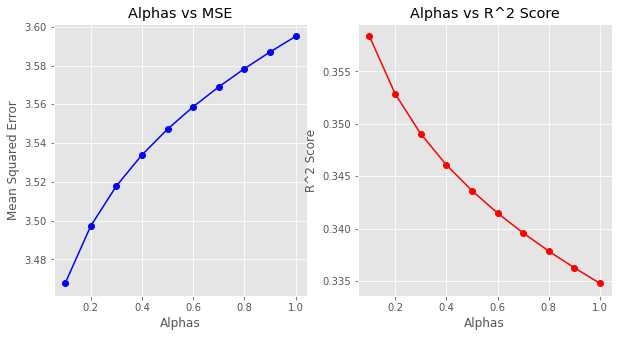

In [11]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')

## Lasso regression

Text(0, 0.5, 'R^2 Score')

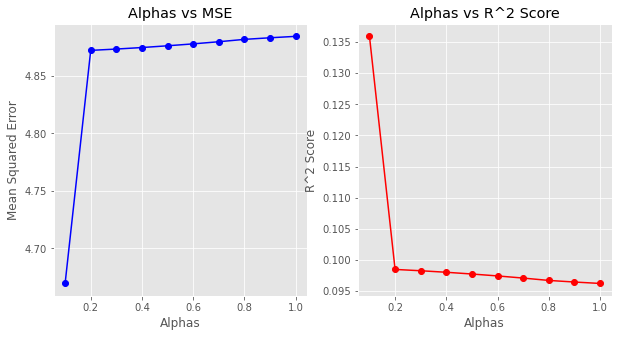

In [12]:
from sklearn.linear_model import Lasso

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)

mse_scores = []
r2_scores = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_scores, marker='o', linestyle='-', color='b')
plt.title('Alphas vs MSE')
plt.xlabel('Alphas')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_scores, marker='o', linestyle='-', color='r')
plt.title('Alphas vs R^2 Score')
plt.xlabel('Alphas')
plt.ylabel('R^2 Score')

## Elsaticnet regression

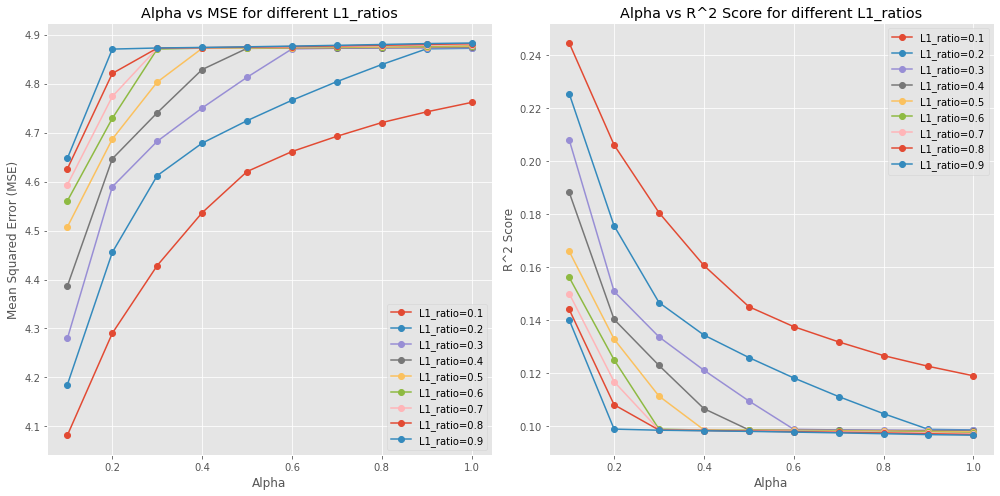

In [13]:
from sklearn.linear_model import ElasticNet

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

alphas = np.arange(0.1, 1.1, 0.1)
l1_ratios = np.arange(0.1, 1, 0.1)

mse_scores = {l1_ratio: [] for l1_ratio in l1_ratios}
r2_scores = {l1_ratio: [] for l1_ratio in l1_ratios}

for l1_ratio in l1_ratios:
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        mse_scores[l1_ratio].append(mse)
        r2_scores[l1_ratio].append(r2)

plt.figure(figsize=(14, 7))

# MSE plot
plt.subplot(1, 2, 1)
for l1_ratio in l1_ratios:
    plt.plot(alphas, mse_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs MSE for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

# R^2 score plot
plt.subplot(1, 2, 2)
for l1_ratio in l1_ratios:
    plt.plot(alphas, r2_scores[l1_ratio], label=f'L1_ratio={l1_ratio:.1f}', marker = 'o')
plt.title('Alpha vs R^2 Score for different L1_ratios')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


## Support Vector Regression (SVR)

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


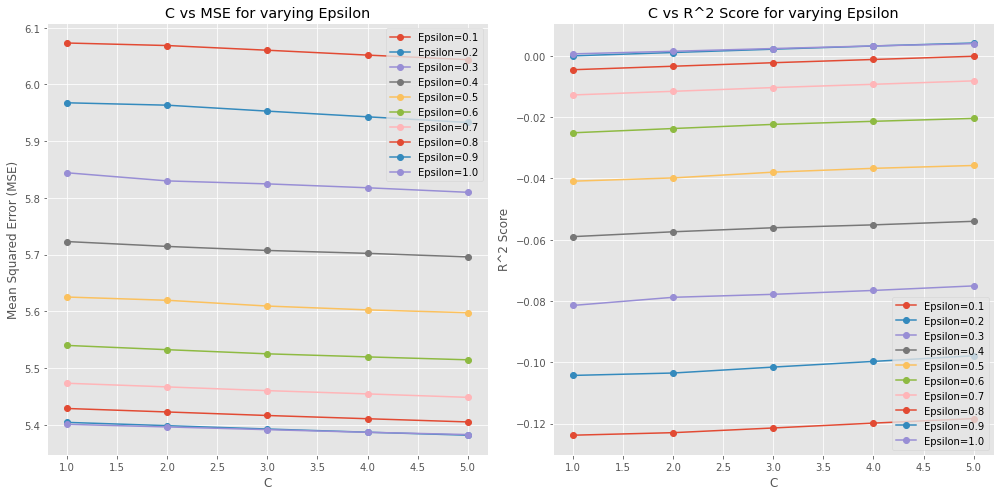

In [14]:
from sklearn.svm import SVR

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

C_values = np.arange(1.0, 6.0, 1)
epsilon_values = np.arange(0.1, 1.1, 0.1)

mse_scores = np.zeros((len(C_values), len(epsilon_values)))
r2_scores = np.zeros((len(C_values), len(epsilon_values)))

for i, C in enumerate(C_values):
    for j, epsilon in enumerate(epsilon_values):
        svr_model = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr_model.fit(X_train, Y_train)
        Y_pred = svr_model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, mse_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs MSE for varying Epsilon')
plt.xlabel('C')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.subplot(1, 2, 2)
for j, epsilon in enumerate(epsilon_values):
    plt.plot(C_values, r2_scores[:, j], label=f'Epsilon={epsilon:.1f}', marker = 'o')
plt.title('C vs R^2 Score for varying Epsilon')
plt.xlabel('C')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


## Decision tree regression

In [15]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, Y_train)

Y_pred = dt_regressor.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1.1137596664195386
R^2 Score: 0.7939071820208746


## Random forest regression

C:\Users\Myeongyeon Lee\AppData\Local\Temp\ipykernel_21736\3703062517.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, Y_train)
C:\Users\Myeongyeon Lee\AppData\Local\Temp\ipykernel_21736\3703062517.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, Y_train)
C:\Users\Myeongyeon Lee\AppData\Local\Temp\ipykernel_21736\3703062517.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, Y_train)
C:\Users\Myeongyeon Lee\AppData\Local\Temp\ipykernel_21736\3703062517.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

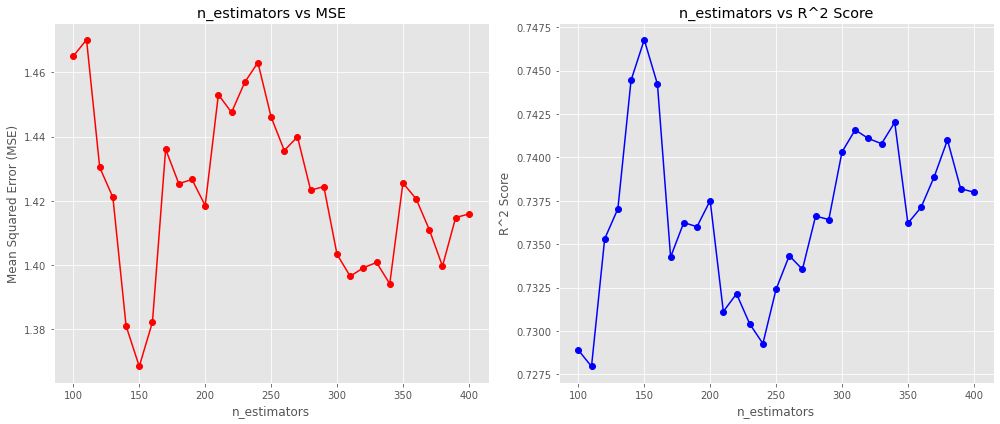

In [16]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, Y_train, Y_test = train_test_split(DPP_DTT_X, DPP_DTT_Y, test_size=0.2, random_state=42)

n_estimators_range = range(100, 410, 10)

mse_scores = []
r2_scores = []

for n_estimators in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, Y_train)
    Y_pred = rf_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_estimators vs MSE')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error (MSE)')

# Plotting n_estimators vs R^2
plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_estimators vs R^2 Score')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

## Gradient bossting regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

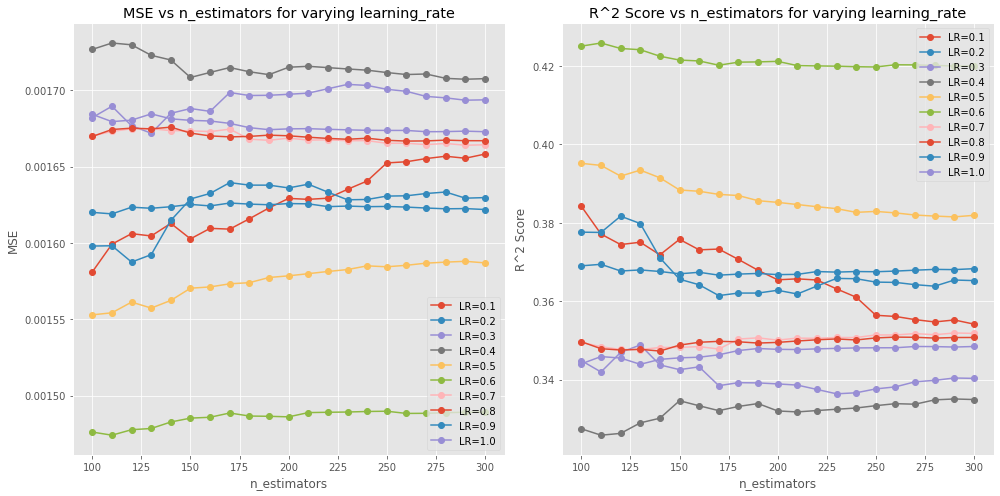

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Parameter ranges
n_estimators_range = range(100, 310, 10)
learning_rate_range = np.arange(0.1, 1.1, 0.1)
fixed_max_depth = 3 

# Initialize storage for performance metrics
mse_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))
r2_scores = np.zeros((len(learning_rate_range), len(n_estimators_range)))

# Evaluate model performance over varying n_estimators and learning_rate
for i, learning_rate in enumerate(learning_rate_range):
    for j, n_estimators in enumerate(n_estimators_range):
        model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=fixed_max_depth, random_state=42)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse_scores[i, j] = mean_squared_error(Y_test, Y_pred)
        r2_scores[i, j] = r2_score(Y_test, Y_pred)

# Plotting
plt.figure(figsize=(14, 7))

# MSE Plot
plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, mse_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('MSE vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('MSE')
plt.legend()

# R^2 Score Plot
plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, r2_scores[i, :], label=f'LR={learning_rate:.1f}', marker = 'o')
plt.title('R^2 Score vs n_estimators for varying learning_rate')
plt.xlabel('n_estimators')
plt.ylabel('R^2 Score')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

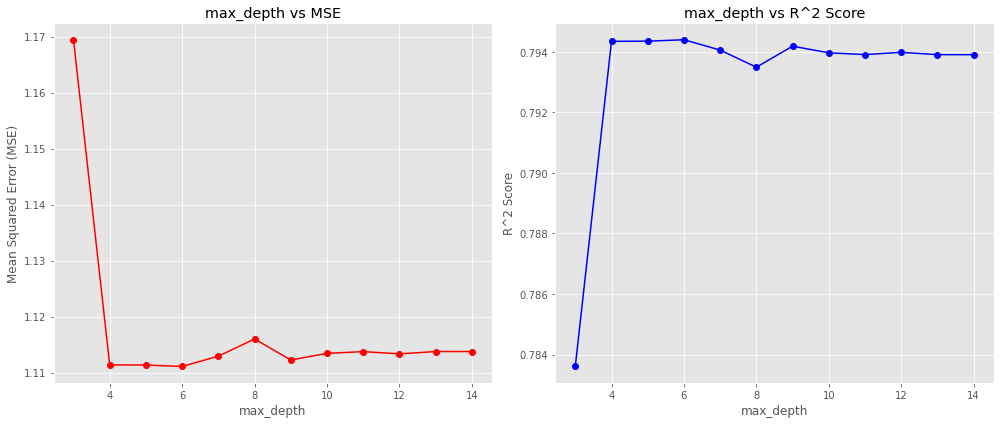

In [19]:
from sklearn.ensemble import GradientBoostingRegressor

fixed_learning_rate = 0.6
fixed_n_estimators = 210
max_depth_range = range(3, 15)

mse_scores = []
r2_scores = []

for max_depth in max_depth_range:
    model = GradientBoostingRegressor(n_estimators=fixed_n_estimators, learning_rate=fixed_learning_rate, max_depth=max_depth, random_state=42)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(max_depth_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('max_depth vs MSE')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(max_depth_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('max_depth vs R^2 Score')
plt.xlabel('max_depth')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()

## K-nearest Neighbors Regression

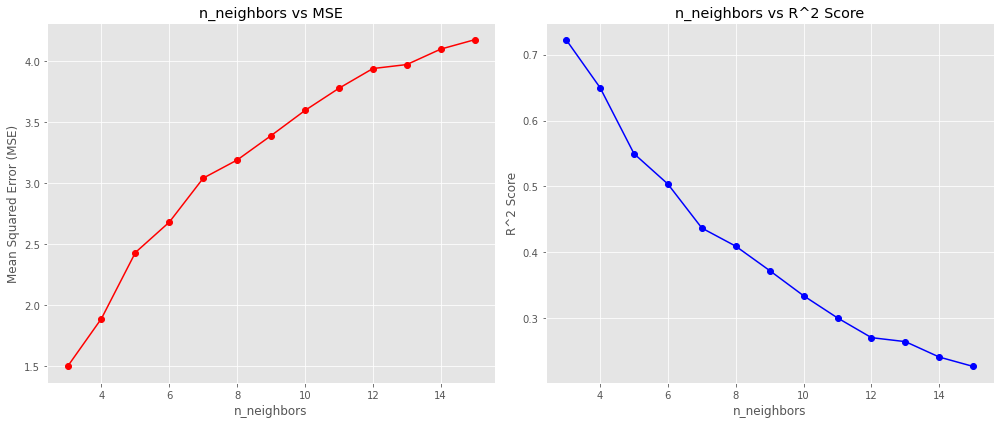

In [20]:
from sklearn.neighbors import KNeighborsRegressor

n_neighbors_range = range(3, 16)

mse_scores = []
r2_scores = []

for n_neighbors in n_neighbors_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, Y_train)
    Y_pred = knn_regressor.predict(X_test)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_neighbors_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('n_neighbors vs MSE')
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(n_neighbors_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('n_neighbors vs R^2 Score')
plt.xlabel('n_neighbors')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()


## Neural network regression

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataC

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataC

C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Myeongyeon Lee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataC

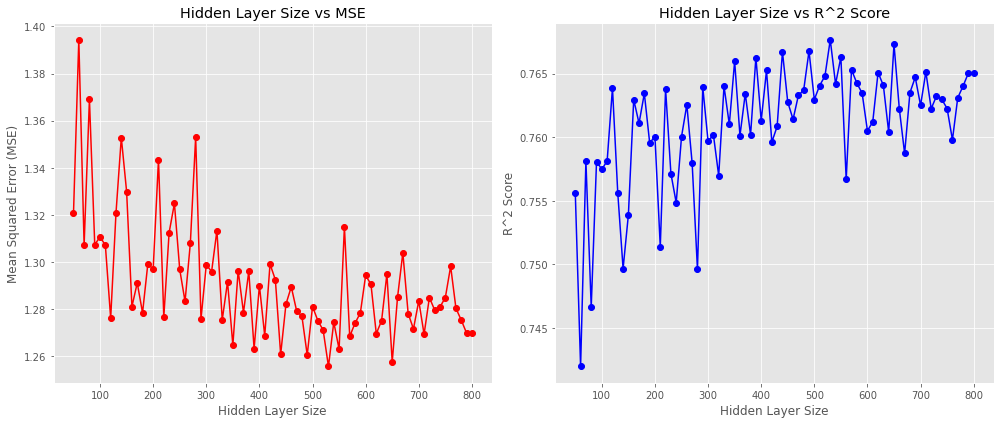

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

hidden_layer_sizes_range = range(50, 810, 10)

mse_scores = []
r2_scores = []

for size in hidden_layer_sizes_range:
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    mlp_regressor.fit(X_train_scaled, Y_train)
    Y_pred = mlp_regressor.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test, Y_pred))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(hidden_layer_sizes_range, mse_scores, marker='o', linestyle='-', color='red')
plt.title('Hidden Layer Size vs MSE')
plt.xlabel('Hidden Layer Size')
plt.ylabel('Mean Squared Error (MSE)')

plt.subplot(1, 2, 2)
plt.plot(hidden_layer_sizes_range, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Hidden Layer Size vs R^2 Score')
plt.xlabel('Hidden Layer Size')
plt.ylabel('R^2 Score')

plt.tight_layout()
plt.show()
